In [ ]:
#-*- coding: utf-8 -*-

In [1]:
# bibliothèques 
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk import word_tokenize
from time import perf_counter as pf 
from nltk import StanfordTagger
from textblob import TextBlob
from nltk.tag import StanfordPOSTagger
from nltk import pos_tag, RegexpParser
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.util import ngrams
from nltk import ngrams
from nltk.probability import FreqDist
import matplotlib.pyplot as plt 
import nltk
import numpy as np
import glob, re, os
import pandas as pd
import string
import spacy
import langid
import json
import statistics
from langid.langid import LanguageIdentifier, model
import gensim.models

In [2]:
# fonctions 
def lire_fichier(chemin):
    fichier = open(chemin, encoding='utf-8')
    chaine = fichier.read()
    fichier.close()
    return chaine

def lire_fichier_lignes(chemin):
    with open(chemin) as f:
        lignes = f.readlines()
    return lignes

In [ ]:
# tous les articles TALN # calculer le nombre de mots par section dans chaque article,nbcaractères par sectiob
print("conférences TALN")
print("__"*50)
cpt1 = 1
for root1, dirs1 ,files1 in os.walk("../data/taln-archives-master/TALN/"):
    for file1 in files1:
        if file1.endswith(".txt"):
            liste_fichiers_taln = glob.glob(os.path.join(root1, file1))
            for chemin_taln in liste_fichiers_taln:
                docs1_taln = lire_fichier(chemin_taln)
                print(chemin_taln)
                print("taille du document", cpt1 ,":",len(docs1_taln), "caractères")
                nb_mots = len(docs1_taln.split())
                print(nb_mots, "mots environs")
                cpt1 += 1

In [ ]:
# tous les articles RECITAL
print("conférences RECITAL")
print("__"*50)
cpt2 = 1
for root2, dirs2 ,files2 in os.walk("../data/taln-archives-master/RECITAL/"):
    for file2 in files2:
        if file2.endswith(".txt"):
            liste_fichiers_RECITAL = glob.glob(os.path.join(root2, file2))
            for chemin_recital in liste_fichiers_RECITAL:
                docs2_recital = lire_fichier(chemin_recital)
                print(chemin_recital)
                print("taille du document", cpt2 ,":",len(docs2_recital), "caractères")
                nb_mots = len(docs2_recital.split())
                print(nb_mots, "mots environs")
                cpt2 += 1

In [3]:
fichiers = glob.glob("../data_xml/968.pdf.tei.xml")
for chemin in fichiers:
    doc = lire_fichier(chemin)
    print(len(doc))
    soup = BeautifulSoup(doc, 'html.parser')

69898


/home/didierk/anaconda3/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [30]:
liste_sections = []
for cpt, bloc in enumerate(soup.find_all("div")):
    section = bloc.text
    if len(section) < 100:
        continue
    print("\033[1m" + "section",cpt, "\033[0m")
    #sections = re.split("\n\n", section)
    #print(sections)
    liste_sections.append(section)
    print(section)

section 0 
Dans le contexte général des traitements multimodaux, nous nous intéressons à la tâche de réponse à des questions visuelles à propos d'entités nommées en utilisant des bases de connaissances (KVQAE). Nous mettons à disposition ViQuAE, un nouveau jeu de données de 3 700 questions associées à des images, annoté à l'aide d'une méthode semi-automatique. C'est le premier jeu de données de KVQAE comprenant des types d'entités variés associé à une base de connaissances composée d'1,5 million d'articles Wikipédia, incluant textes et images. Nous proposons également un modèle de référence de KVQAE en deux étapes : recherche d'information puis extraction des réponses. Les résultats de nos expériences démontrent empiriquement la difficulté de la tâche et ouvrent la voie à une meilleure représentation multimodale des entités nommées.
section 1 
Introduction et travaux connexesLa fusion de modalités telles que l'image et le texte pour rechercher des informations est un problème ancien et

In [5]:
print(type(liste_sections))
print(len(liste_sections))

<class 'list'>
8


In [6]:
# caratérsitiques de chaque paragraphe qui seront peut-être utiles 
X_stylo = []
for paragraphe, texte in enumerate(liste_sections): 
    
    paragraphe = paragraphe
    liste_mots1 = texte.split()
    phrases1 = texte.split(". ")
    NB_phrases1 = len(phrases1)
    NB_mots1 = len(liste_mots1)
    NB_caracteres1 = len(texte)
    moyenne_taille_mots1 = statistics.mean([len(x) for x in liste_mots1])
    moyenne_taille_phrases1 = NB_mots1/NB_phrases1
    caracteristiques1 = [NB_phrases1, NB_mots1, NB_caracteres1, moyenne_taille_mots1, moyenne_taille_phrases1]
    
    if paragraphe < len(liste_sections)-1:
        paragraphe2 = liste_sections[paragraphe+1]
        liste_mots2 = texte.split()
        phrases2 = texte.split(". ")
        NB_phrases2 = len(phrases2)
        NB_mots2 = len(liste_mots2)
        NB_caracteres2 = len(texte)
        moyenne_taille_mots2 = statistics.mean([len(x) for x in liste_mots2])
        moyenne_taille_phrases2 = NB_mots2/NB_phrases1
        caracteristiques2 = [NB_phrases2, NB_mots2, NB_caracteres2, moyenne_taille_mots2, moyenne_taille_phrases2]
        
caracteristiques = [caracteristiques1, caracteristiques2]

In [7]:
print("caractéristiques de la section 1 : ", caracteristiques1)
print()
print("caractéristiques de la section suivante : ", caracteristiques2)

caractéristiques de la section 1 :  [12, 917, 7511, 6.47546346782988, 76.41666666666667]

caractéristiques de la section suivante :  [3, 42, 296, 6.071428571428571, 14.0]


In [8]:
X_stylo.append(caracteristiques)
print(X_stylo)

[[[12, 917, 7511, 6.47546346782988, 76.41666666666667], [3, 42, 296, 6.071428571428571, 14.0]]]


In [9]:
# vectoriser le document 
V = CountVectorizer(ngram_range=(1, 2))
#X = V.fit_transform(liste_sections).todense()
X = V.fit_transform(liste_sections).toarray()
#print(features)
print(type(X))
#for distance in ["braycurtis"]:
    #distance = DistanceMetric.get_metric(distance)
print(X.shape)



# calcul de la similarité entre sections 
from scipy.spatial import distance
for cpt, vecteur in enumerate(X):
    vecteur = vecteur #!
    if cpt < len(liste_sections)-1:
        vecteur2 = X[cpt+1]
        #print(distance)
        #similarite = cpt, distance.pairwise(vecteur, vecteur2)
        similarite_cosine = ("section",cpt, "--->" ,distance.cosine(vecteur, vecteur2))
        #print(similarite)
        print(similarite_cosine)

<class 'numpy.ndarray'>
(8, 3528)
('section', 0, '--->', 0.36907825434242925)
('section', 1, '--->', 0.3324407868239996)
('section', 2, '--->', 0.37131192819192604)
('section', 3, '--->', 0.3862889895904271)
('section', 4, '--->', 0.6811723018596583)
('section', 5, '--->', 0)
('section', 6, '--->', 0.9898993050294953)


/home/didierk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Cluster des sections')

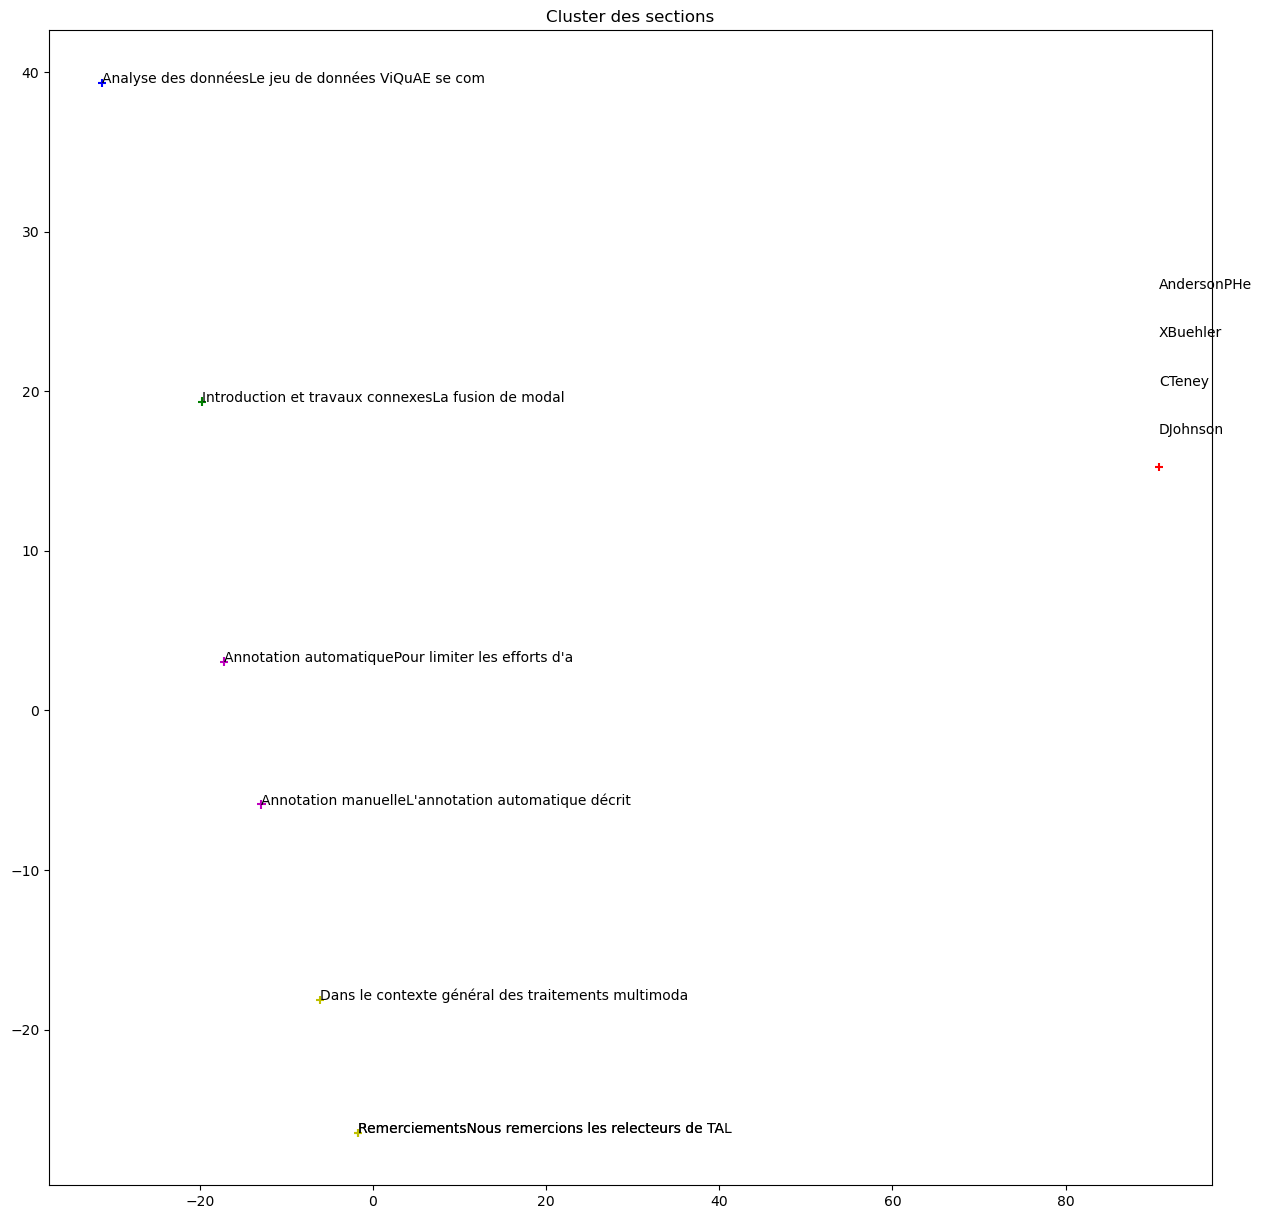

In [10]:
# cluster pour les tokens 

vecteurs = X
km = KMeans(n_clusters=5,init = 'k-means++', random_state =0, max_iter=500)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]
fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y, c=[colors[d] for d in predire_clusters], marker='+')
centroides = km.cluster_centers_


for i, txt in enumerate(liste_sections):
    ax.annotate(txt[0:50], (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")
plt.title("Cluster des sections")

In [11]:
modele = spacy.load('fr_core_news_md')
#modele = spacy.load('en_core_web_sm')

In [13]:
texte_etiquettes = []
for par in liste_sections:
    liste_tokens = modele(par)
    liste_etiquettes = [token.pos_ for token in liste_tokens]
    texte_etiquettes.append(" ".join(liste_etiquettes))
print(type(liste_etiquettes))
print("nombre étiquettes paragraphes 1 : ", len(texte_etiquettes[0]))
print("nombre étiquettes paragraphes 2 : ", len(texte_etiquettes[1]))
print()
print("nombre de paragraphes étiquettés : ", len(texte_etiquettes))
print()
#print("paragraphe étiquetté 1 : ", texte_etiquettes[0])

<class 'list'>
nombre étiquettes paragraphes 1 :  668
nombre étiquettes paragraphes 2 :  3031

nombre de paragraphes étiquettés :  8



In [16]:
#from scipy.spatial import distance
V = CountVectorizer(analyzer='word',ngram_range=(1,5))
X_pos = V.fit_transform(texte_etiquettes).toarray()
#X_pos = V.fit_transform(texte_etiquettes).todense()
for cpt, vecteur in enumerate(X_pos):
    vecteur = vecteur
    if cpt<len(texte_etiquettes)-1:
        vecteur2 = X_pos[cpt+1]
        #similarite = cpt, distance.pairwise(vecteur, vecteur2) #todense
        similarite_cosine = cpt, distance.cosine(vecteur, vecteur2)
        print(similarite_cosine)
        #print(similarite)
#distances = distance.pairwise(X_pos) # todense
#ax = sns.heatmap(distances)

(0, 0.08666927192715923)
(1, 0.06779120989426912)
(2, 0.09100598397440485)
(3, 0.08755263362486343)
(4, 0.16159481673192333)
(5, 0.006637241481730727)
(6, 0.7625185644578502)


/home/didierk/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


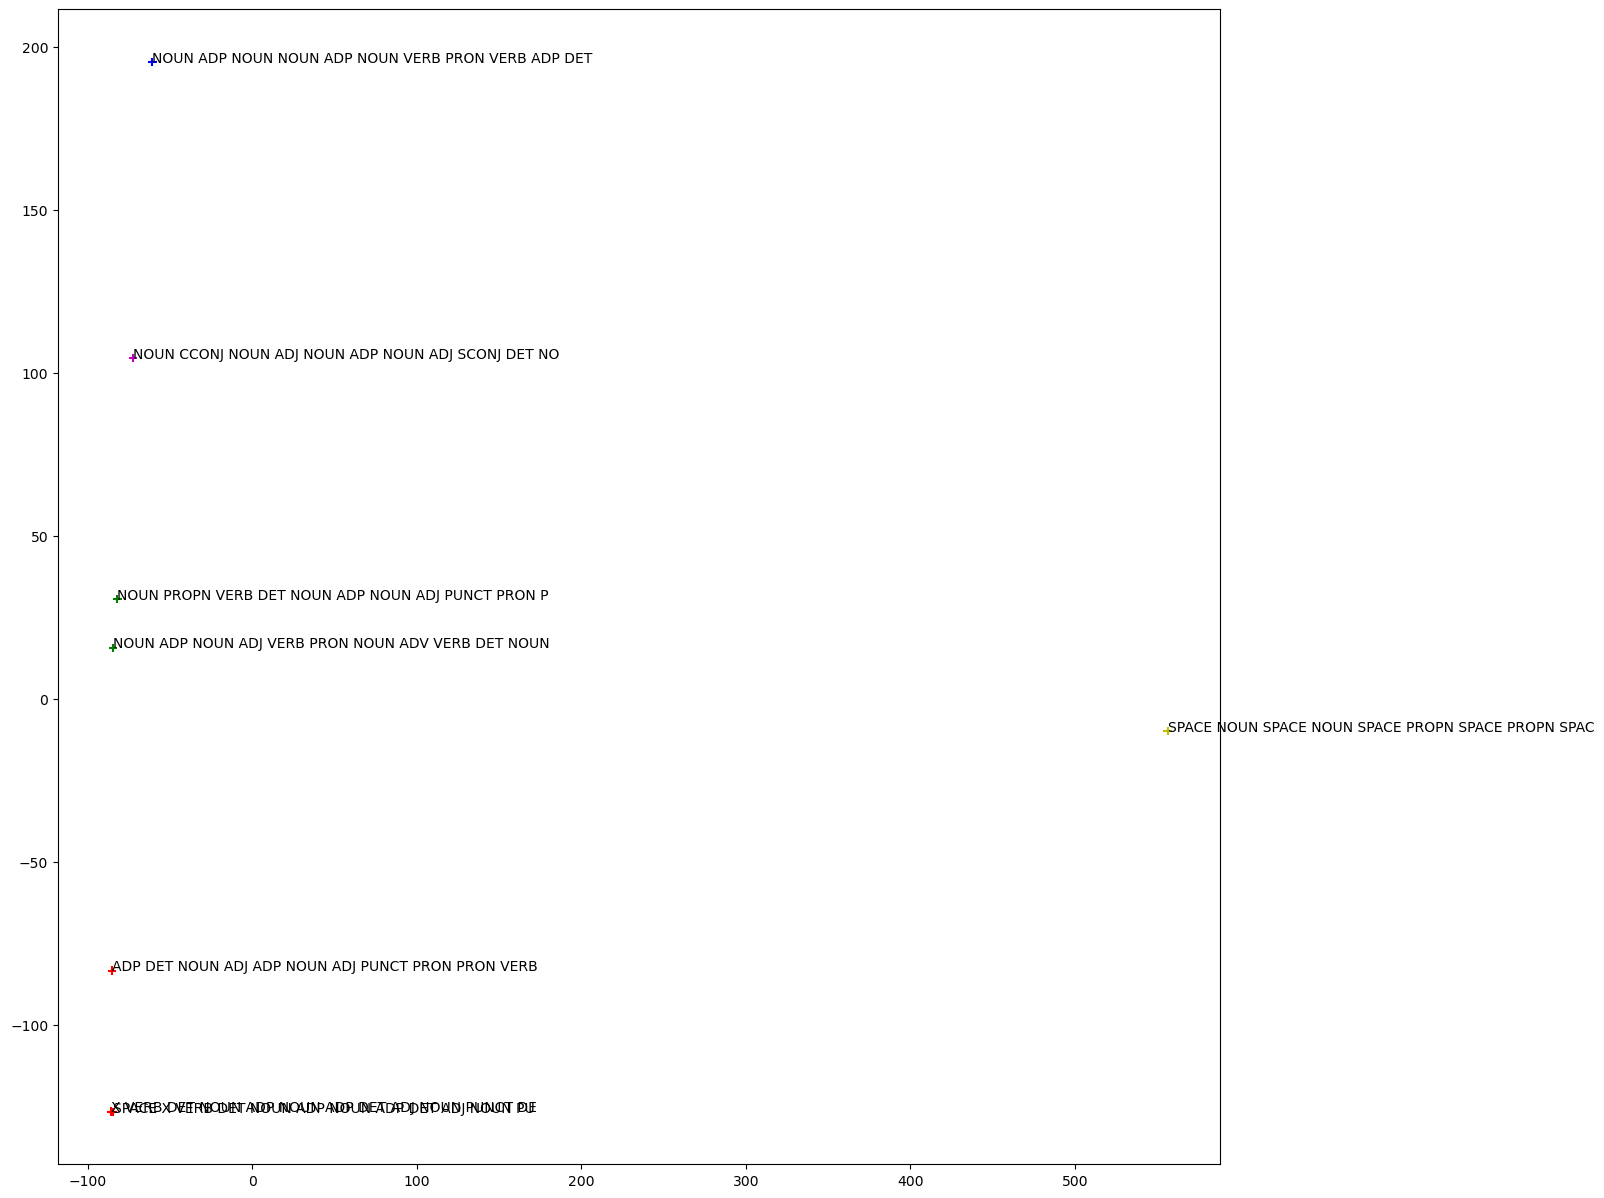

In [17]:
#cluster des unigrammes d'étiquettes 
vecteurs = X_pos
km = KMeans(n_clusters=5,init = 'k-means++', random_state = 0, max_iter=500)
predire_clusters = km.fit_predict(vecteurs)

pca = PCA(n_components=3)
nuage_points = pca.fit_transform(vecteurs)

colors = ["b", "y", "r", "g", "m" ]

abscisses_x = [o[0] for o in nuage_points]
ordonnees_y = [o[1] for o in nuage_points]

fig, ax = plt.subplots(figsize=(15,15))

scatter = ax.scatter(abscisses_x, ordonnees_y,c=[colors[d] for d in predire_clusters], marker='+')


centroides = km.cluster_centers_

cen_x = [i[0] for i in centroides] 
cen_y = [i[1] for i in centroides]


for i, txt in enumerate(texte_etiquettes):
    ax.annotate(txt[0:50], (abscisses_x[i], ordonnees_y[i]))

ax.set_facecolor("white")

In [18]:
# cluster des ngrammes d'étiquettes ()

In [20]:
print(cen_x)
print(cen_y)

[52.0, 23.0, 4.0, 19.5, 28.0]
[4.0, 1.0, 0.0, 0.0, 0.0]


In [21]:
print(km.labels_)

[2 4 3 3 0 2 2 1]


In [22]:
# calcul du taux de lexicalité avec le glaff  

with open("../data/GLAFF-1.2.2/glaff-1.2.2.txt",encoding='utf-8') as f:
    ligne = f.readline()
    cpt = 0 
    dic_glaff = {}
    while len(ligne) > 0:
        cpt += 1
        elements = re.split("\|", re.sub("\n", "", ligne))
        frequence = 0 
        forme = elements[0]
        for index in range(6, len(elements)+1, 2):
            frequence += float(elements[index])
        dic_glaff[forme] = frequence
        ligne = f.readline()
with open("freq_glaff_%i.json"%cpt, "w") as w:
    w.write(json.dumps(dic_glaff))
set_mots_glaff = set(dic_glaff.keys())
print("taille glaff : %i types"%len(set_mots_glaff))

taille glaff : 1082688 types


In [23]:
with open("freq_glaff_1406857.json", encoding='utf-8') as f:
        glaff = json.load(f)
        mots_glaff = set(glaff)

In [24]:

for section, texte in enumerate (liste_sections):
    print()
    print("\033[1m" + "section", section, "\033[0m")
    section = section
    lexique = re.findall("[a-zA-ZÀ-ÿ][a-zA-ZÀ-ÿ-]*", texte)
    #lexique = [mot for mot in lexique if mot[0].isupper()==False]
    set_mots_lexique = set(lexique)
    
    # on a besoin de calculer la fréquence de chaque mots dans chaque section pour obtenir le taux de lexicalité 
    
    dic_freq = {}
    for mot in lexique:
        if mot not in dic_freq:
            dic_freq[mot] = 1
        else:
            dic_freq[mot] += 1
    paires = [[effectif, mot] for mot, effectif in dic_freq.items()]
    liste_tri = sorted(paires, reverse=True)
    plus_freq = set([mot for effectif, mot in liste_tri])
    
    communs = set(dic_freq.keys()).intersection(mots_glaff)
    absents = set(dic_freq.keys()).difference(mots_glaff)
    
    print("présents dans le glaff --->", len(communs))
    print("absents dans le glaff --->", len(absents))
    
    taux_de_lexicalite = len(communs)/len(dic_freq)
    
    print('\033[1;34m' + "taux de lexicalité : ",taux_de_lexicalite,'\033[0m')
    
    if taux_de_lexicalite < 0.5:
        print("!!!")


section 0 
présents dans le glaff ---> 69
absents dans le glaff ---> 10
taux de lexicalité :  0.8734177215189873 

section 1 
présents dans le glaff ---> 197
absents dans le glaff ---> 102
taux de lexicalité :  0.6588628762541806 

section 2 
présents dans le glaff ---> 150
absents dans le glaff ---> 39
taux de lexicalité :  0.7936507936507936 

section 3 
présents dans le glaff ---> 163
absents dans le glaff ---> 33
taux de lexicalité :  0.8316326530612245 

section 4 
présents dans le glaff ---> 227
absents dans le glaff ---> 73
taux de lexicalité :  0.7566666666666667 

section 5 
présents dans le glaff ---> 25
absents dans le glaff ---> 12
taux de lexicalité :  0.6756756756756757 

section 6 
présents dans le glaff ---> 25
absents dans le glaff ---> 12
taux de lexicalité :  0.6756756756756757 

section 7 
présents dans le glaff ---> 34
absents dans le glaff ---> 443
taux de lexicalité :  0.07127882599580712 
!!!


In [29]:
# calcul de la fréquence des éléments de syntaxe
#from nltk.collocations import BigramCollocationFinder
#from nltk.metrics import BigramAssocMeasures
import itertools

liste_sections = []
for cpt, bloc in enumerate(soup.find_all("div")):
    section = bloc.text
    if len(section) < 100:
        continue
    print("\033[1m" + "section",cpt, "\033[0m")
    #sections = re.split("\n\n", section)
    #print(sections)
    cpt += 1
    #print(section)
    liste_sections.append(section)
    jar = 'stanford-postagger-full-2020-11-17/stanford-postagger.jar'
    modele = 'stanford-postagger-full-2020-11-17/models/french-ud.tagger'
    blob = TextBlob(section)
    pos_tag = StanfordPOSTagger(modele, jar, encoding='utf-8')
    etiquettes = pos_tag.tag(blob.split())
    #print(etiquettes)
    res = [[i for i, j in etiquettes],[j for i, j in etiquettes]]
    pos = res[1] 
    pos = ' '.join(pos)
    #print(pos)
    
    #------------ calcul des ngrammes d'étiquettes avec fréquences d'apparitions
    
    pos = pos.lower()
    tokens = [token for token in pos.split(" ") if token != ""] 
    
    pos_freq = nltk.FreqDist(tokens)
    ngram_freq = nltk.FreqDist(nltk.ngrams(tokens, 2))
    ngram_plus_freq = ngram_freq.most_common()
    
    print(ngram_plus_freq)
    
    # ----------- ngram des étiquettes sans fréquences 
    
    ngram_pos = nltk.ngrams(tokens, 2)
    ngram_pos = [[i for i in ngram_pos],[j for i in ngram_pos]]
    #print(ngram_pos)
    
    sortie = list(itertools.chain(*ngram_pos))
    liste_ngrammes_pos = list(itertools.chain(*sortie))
    #print(sortie)
    
    if cpt == 5:
        break

section 0 
[(('det', 'noun'), 17), (('noun', 'adp'), 13), (('adp', 'det'), 8), (('adp', 'noun'), 8), (('noun', 'adj'), 7), (('verb', 'adp'), 6), (('noun', 'verb'), 6), (('verb', 'det'), 5), (('pron', 'verb'), 3), (('det', 'adj'), 3), (('adj', 'noun'), 3), (('num', 'noun'), 3), (('adj', 'det'), 2), (('adp', 'verb'), 2), (('noun', 'propn'), 2), (('adp', 'num'), 2), (('adj', 'verb'), 2), (('adp', 'propn'), 2), (('propn', 'verb'), 2), (('noun', 'cconj'), 2), (('cconj', 'verb'), 2), (('verb', 'adv'), 2), (('adv', 'det'), 2), (('noun', 'det'), 2), (('adj', 'pron'), 1), (('pron', 'pron'), 1), (('adj', 'adp'), 1), (('verb', 'verb'), 1), (('propn', 'pron'), 1), (('propn', 'det'), 1), (('num', 'num'), 1), (('verb', 'adj'), 1), (('verb', 'num'), 1), (('adj', 'propn'), 1), (('verb', 'noun'), 1), (('verb', 'pron'), 1), (('propn', 'adp'), 1), (('noun', 'punct'), 1), (('punct', 'noun'), 1), (('noun', 'noun'), 1), (('noun', 'sconj'), 1), (('sconj', 'noun'), 1)]
section 1 
[(('det', 'noun'), 69), (('no

In [ ]:
help(Word2Vec)